# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** I Made Prenawa Sida Nanda
- **Email:** prenawasidananda@gmail.com
- **ID Dicoding:** sidananda97

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penjualan setiap bulan selama satu tahun terakhir?
- Pertanyaan 2: Metode pembayaran mana yang paling populer di antara pelanggan selama satu tahun terakhir?
- Pertanyaan 3: Di wilayah mana produk e-commerce paling sering dipesan?

## Import Semua Packages/Library yang Digunakan

impor pandas untuk mengelola dan memanipulasi data dalam bentuk data frame. Matplotlib dan Seaborn akan digunakan untuk membuat visualisasi data agar lebih mudah dipahami. Pengaturan gaya visualisasi dilakukan agar grafik yang dihasilkan terlihat lebih rapi dan konsisten.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline             

**Insight:** 

- Pandas akan digunakan untuk memuat dan memproses dataset.
- Matplotlib dan Seaborn akan digunakan untuk membuat visualisasi yang sesuai dengan pertanyaan bisnis yang telah dirumuskan.
- NumPy dapat digunakan untuk perhitungan dan pemrosesan data tambahan.

## Data Wrangling

### Gathering Data

### Tahap Pengumpulan Data
Pada tahap ini, memuat dataset yang relevan untuk menjawab pertanyaan bisnis.
Dataset yang akan digunakan meliputi:
1. **Orders Dataset**: Untuk menganalisis tren penjualan dan wilayah pesanan.
2. **Order Payments Dataset**: Untuk menganalisis metode pembayaran yang paling populer.
3. **Customers Dataset**: Untuk memetakan lokasi pelanggan dan menganalisis wilayah pemesanan.


In [2]:
orders = pd.read_csv("data/orders_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
customers = pd.read_csv("data/customers_dataset.csv")          


Saya melakukan pembacaan data dengan metode read_csv pada library pandas lalu akan lanjut melihat contoh data dari masing-masing data frame dengan metode head()

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Penggabungan Data
Untuk menjawab beberapa pertanyaan, khususnya pertanyaan nomor 3, saya menggabungkan orders dataset dengan customers dataset berdasarkan kolom customer_id untuk mendapatkan informasi lokasi pelanggan. Selain itu, saya juga menggabungkan order_payments dataset berdasarkan order_id agar bisa menganalisis metode pembayaran. Hasilnya akan berupa satu dataset gabungan yang mencakup informasi pesanan, pembayaran, dan lokasi pelanggan.


In [6]:
main_data = pd.merge(pd.merge(orders, order_payments, on='order_id', how='left'), customers, on='customer_id', how='left')

In [7]:
main_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


**Insight:**
- main_data sekarang berisi informasi dari ketiga dataset: orders, order_payments, dan customers.
- Orders dataset berisi informasi mengenai pesanan, termasuk tanggal pembelian yang akan digunakan untuk menjawab pertanyaan terkait tren penjualan dan wilayah pemesanan. Order payments dataset berisi metode pembayaran yang akan digunakan untuk mengetahui metode pembayaran paling populer Customers dataset akan digunakan untuk memetakan wilayah pesanan.

### Assessing Data

### Meninjau Data
Pada tahap ini, kita akan memeriksa informasi umum mengenai data yang telah digabungkan dalam **main_data**, termasuk tipe data, jumlah baris, jumlah nilai null, dan apakah terdapat baris yang duplikat.


In [8]:

main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_sequential             103886 non-null  float64
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  float64
 11  payment_value                  103886 non-null  float64
 12  customer_unique_id            

Selanjutnya, saya akan melakukan pengecekan nilai null pada dataframe tersebut. Hal ini dilakukan menggunakan method .isnull() dan .sum()

In [14]:
main_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [15]:
main_data.duplicated().sum()

0

In [11]:
main_data['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [12]:
main_data['customer_city'].value_counts()

customer_city
sao paulo         16221
rio de janeiro     7207
belo horizonte     2872
brasilia           2193
curitiba           1576
                  ...  
joaquim pires         1
bataipora             1
arame                 1
parisi                1
nova vicosa           1
Name: count, Length: 4119, dtype: int64

In [13]:
main_data['order_purchase_timestamp'].min(), main_data['order_purchase_timestamp'].max()

('2016-09-04 21:15:19', '2018-10-17 17:30:18')

**Insight:**
- Pada DataFrame, terdapat beberapa kolom yang memiliki nilai null, namun kolom-kolom tersebut tidak berkaitan langsung dengan analisis yang akan dilakukan. Nilai null yang ditemukan pada kolom terkait payment_type akan diproses dan dibersihkan untuk menjaga kualitas data.
- Tidak terdapat nilai duplikat dalam DataFrame setelah pengecekan.

### Cleaning Data

Menghapus Nilai Null di Kolom payment_type
Mengecek Kembali Setelah Pembersihan
Setelah pembersihan ini, kita bisa mengecek kembali apakah masih ada nilai null atau duplikat yang tersisa:

In [16]:
main_data = main_data.dropna(subset=['payment_type'])

In [17]:
main_data['payment_type'].isnull().sum()

0

Data sudah berhasil dibersihkan. Semua baris dengan nilai null pada kolom `payment_type` telah dihapus.

In [20]:
# Cek jumlah nilai null di kolom yang relevan
main_data[['order_id', 'customer_id', 'payment_type', 'customer_city', 'order_purchase_timestamp']].isnull().sum()




order_id                    0
customer_id                 0
payment_type                0
customer_city               0
order_purchase_timestamp    0
dtype: int64

In [22]:
main_data.duplicated().sum()

0

In [23]:
main_data.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Setelah dilakukan analisis, ditemukan beberapa nilai **`payment_type`** yang berlabel **`not_defined`**. Baris-baris yang mengandung **`payment_type = not_defined`** akan dihapus dari dataset untuk menjaga kualitas data.

In [24]:
# Menghapus baris dengan payment_type 'not_defined'
main_data = main_data[main_data['payment_type'] != 'not_defined']

In [25]:
# Verifikasi hasil setelah penghapusan
main_data['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

In [41]:
main_data.to_csv('dashboard/main_data.csv', index=False)

main_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


**Insight:**
- Nilai null pada kolom payment_type dihapus, sedangkan nilai null pada kolom lain yang tidak berpengaruh dibiarkan.
- Nilai not_defined pada kolom payment_type telah dihapus karena tidak relevan untuk analisis.
- Tidak ditemukan duplikasi data pada kolom yang dianalisis.

## Exploratory Data Analysis (EDA)

### Explore ...

Melihat Parameter Statistik dari Dataframe main_data
Pertama, saya memulai dengan melihat statistik deskriptif dari dataframe main_data yang telah digabungkan. Ini akan memberikan kita gambaran mengenai distribusi data pada berbagai kolom.

In [43]:
main_data.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,103711,103711,103711,103711,103711,103711,103711,103711,103711.000000,103711,103711.000000,103711.000000,103711,103711.000000,103711,103711
unique,99280,99280,7,98719,90732,81375,96043,452,NaN,4,NaN,NaN,95996,NaN,4119,27
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-05-18 00:00:00,2017-12-20 00:00:00,NaN,credit_card,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP
freq,29,29,100742,29,29,47,30,562,NaN,76739,NaN,NaN,33,NaN,16192,43528
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.092362,NaN,2.854750,154.002395,NaN,35079.864894,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705805,NaN,2.687422,217.009306,NaN,29743.930843,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,56.790000,NaN,11370.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,100.000000,NaN,24360.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,4.000000,171.795000,NaN,58423.000000,NaN,NaN


Saya memulai dengan mengeksplorasi data penjualan berdasarkan bulan. Pertama, saya memeriksa kolom order_purchase_timestamp dan memastikan bahwa datanya dalam format datetime yang sesuai, serta mengelompokkan berdasarkan bulan.

In [46]:
# Mengonversi kolom order_purchase_timestamp ke format datetime (jika belum)
main_data['order_purchase_timestamp'] = pd.to_datetime(main_data['order_purchase_timestamp'])

# Membuat kolom baru untuk menyimpan bulan dan tahun dari tanggal pembelian
main_data['order_month_year'] = main_data['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah pesanan per bulan
monthly_sales = main_data.groupby('order_month_year').size().reset_index(name='sales_count')


monthly_sales['order_month_year'] = monthly_sales['order_month_year'].astype(str)

# Menampilkan beberapa baris pertama untuk memastikan perubahan
print(monthly_sales.head(25))



   order_month_year  sales_count
0           2016-09            3
1           2016-10          342
2           2016-12            1
3           2017-01          850
4           2017-02         1886
5           2017-03         2837
6           2017-04         2571
7           2017-05         3944
8           2017-06         3436
9           2017-07         4317
10          2017-08         4550
11          2017-09         4516
12          2017-10         4860
13          2017-11         7863
14          2017-12         5895
15          2018-01         7563
16          2018-02         6952
17          2018-03         7512
18          2018-04         7209
19          2018-05         7135
20          2018-06         6419
21          2018-07         6507
22          2018-08         6696
23          2018-09           15
24          2018-10            4


Untuk mengetahui metode pembayaran yang paling sering digunakan, saya menganalisis kolom payment_type dan menghitung jumlah penggunaan setiap metode.

In [47]:
# Menghitung frekuensi penggunaan setiap metode pembayaran
payment_counts = main_data['payment_type'].value_counts().reset_index(name='count')
payment_counts.columns = ['method', 'count']

# Menampilkan metode pembayaran yang paling populer
payment_counts.head()

,method,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529


Saya mengeksplorasi kolom customer_city dan customer_state untuk melihat wilayah mana yang paling sering memesan produk.

In [48]:
# Mengelompokkan data berdasarkan kota dan negara bagian, lalu menghitung jumlah pesanan di setiap wilayah
location_sales = main_data.groupby(['customer_city', 'customer_state']).size().reset_index(name='order_count')

# Mengurutkan wilayah dengan pesanan terbanyak
top_locations = location_sales.sort_values(by='order_count', ascending=False).head(10)

# Menampilkan wilayah dengan pesanan terbanyak
top_locations


,customer_city,customer_state,order_count
3758,sao paulo,SP,16218
3281,rio de janeiro,RJ,7207
469,belo horizonte,MG,2872
587,brasilia,DF,2193
1187,curitiba,PR,1576
739,campinas,SP,1515
3080,porto alegre,RS,1418
3375,salvador,BA,1347
1587,guarulhos,SP,1250
3574,sao bernardo do campo,SP,979


**Insight:**
- Jumlah pesanan per bulan menunjukkan tren yang fluktuatif, yang mencerminkan variasi permintaan produk setiap bulannya.
- Metode pembayaran yang paling populer di antara pelanggan dapat dilihat pada tabel.
- Kota dengan jumlah pesanan terbanyak dapat diidentifikasi melalui analisis lokasi pelanggan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pertanyaan 1: Bagaimana tren penjualan setiap bulan selama satu tahun terakhir?
Untuk menjawab pertanyaan ini, visualisasi yang saya gunakan adalah Line Chart karena tren penjualan dapat dilihat dengan baik dari waktu ke waktu menggunakan garis.

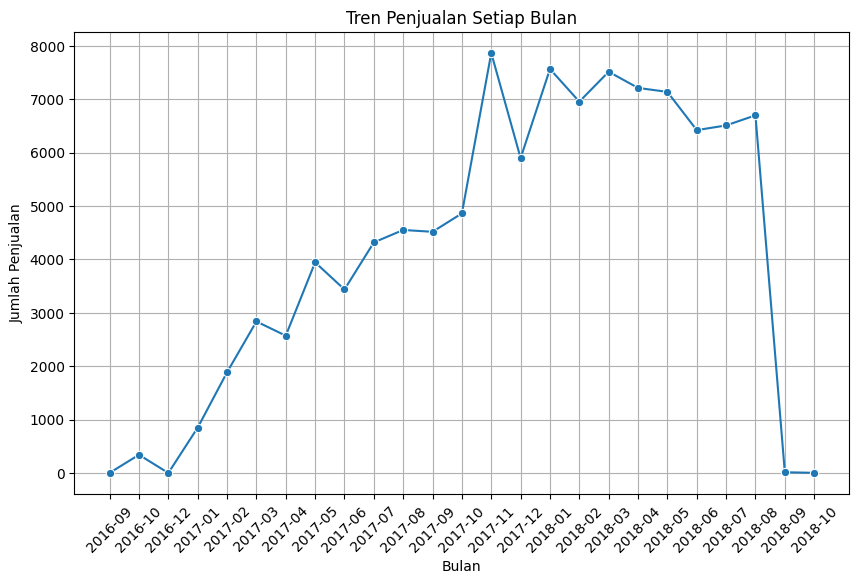

In [49]:

# Visualisasi tren penjualan bulanan menggunakan Line Chart
plt.figure(figsize=(10,6))
sns.lineplot(x='order_month_year', y='sales_count', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Tren Penjualan Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()


### Pertanyaan 2:

Pertanyaan 2: Metode pembayaran mana yang paling populer di antara pelanggan selama satu tahun terakhir?
Untuk menjawab pertanyaan ini, saya menggunakan visualisasi Pie Chart karena membantu memperlihatkan proporsi penggunaan metode pembayaran yang berbeda di kalangan pelanggan.

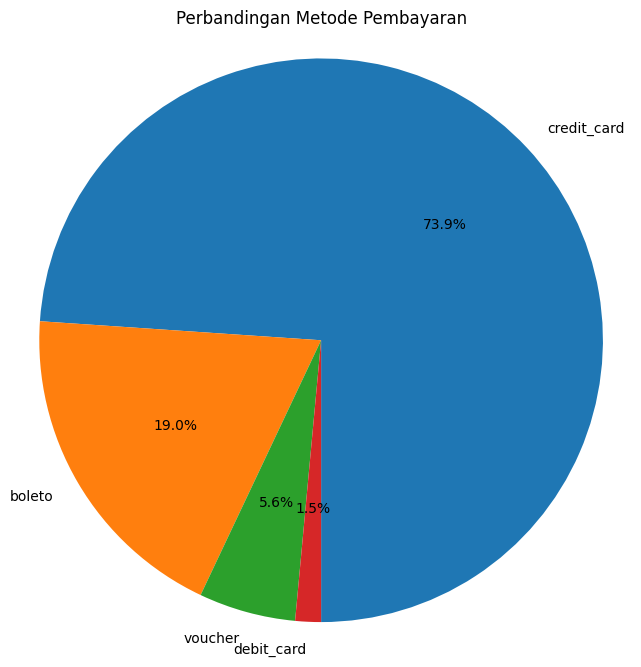

In [50]:
plt.figure(figsize=(8,8))
plt.pie(payment_counts['count'], labels=payment_counts['method'], autopct='%1.1f%%', startangle=270)  
plt.title('Perbandingan Metode Pembayaran')
plt.axis('equal')  
plt.show()



Pertanyaan 3: Di wilayah mana produk e-commerce paling sering dipesan?
Untuk menjawab pertanyaan ini, visualisasi yang saya gunakan adalah Bar Chart karena dapat menunjukkan jumlah pesanan di berbagai kota dengan mudah dan jelas, memudahkan untuk membandingkan jumlah pesanan di setiap wilayah.

C:\Users\Sida Nanda\AppData\Local\Temp\ipykernel_29500\2141532055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_count', y='customer_city', data=top_locations, palette='viridis')


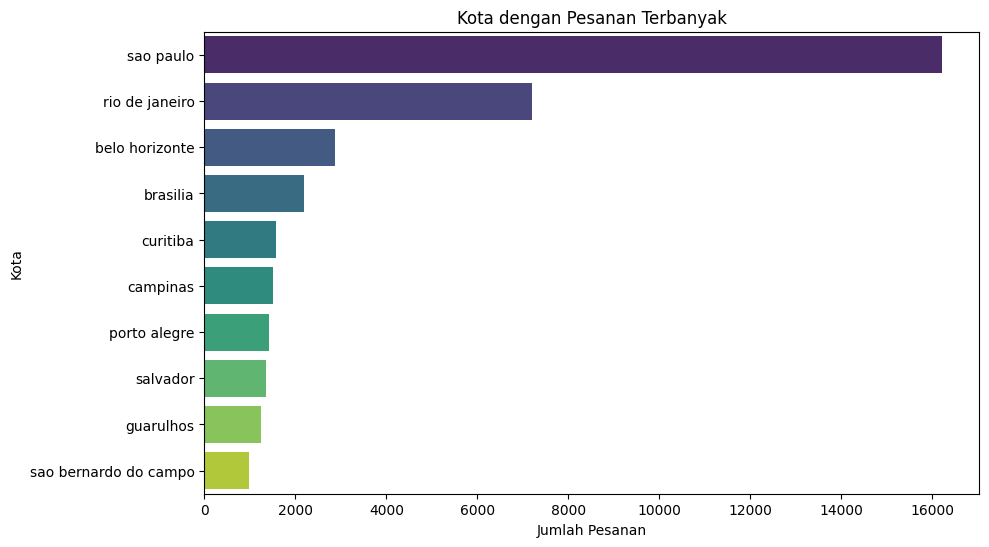

In [51]:
# Mengelompokkan data berdasarkan kota dan negara bagian, menghitung jumlah pesanan di setiap wilayah
location_sales = main_data.groupby(['customer_city', 'customer_state']).size().reset_index(name='order_count')

# Mengurutkan wilayah dengan pesanan terbanyak
top_locations = location_sales.sort_values(by='order_count', ascending=False).head(10)

# Visualisasi wilayah dengan pesanan terbanyak menggunakan Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x='order_count', y='customer_city', data=top_locations, palette='viridis')
plt.title('Kota dengan Pesanan Terbanyak')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kota')
plt.show()


**Insight:**
- Penjualan menunjukkan tren meningkat hingga akhir tahun 2017, diikuti oleh penurunan drastis pada akhir 2018.
- Perbandingan Metode Pembayaran: Metode pembayaran tertinggi adalah kartu kredit dengan 73.9%.
- Kota dengan Pesanan Terbanyak: Kota dengan pesanan terbanyak adalah Sao Paulo.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan 1: Bagaimana tren penjualan setiap bulan selama satu tahun terakhir? Penjualan produk e-commerce menunjukkan tren meningkat sejak tahun 2016, mencapai puncaknya pada November 2017 dengan lebih dari 8.000 pesanan. Namun, terjadi penurunan tajam pada pertengahan hingga akhir 2018, dengan jumlah penjualan turun drastis di bawah 1.000 pada Oktober 2018. 
- Pertanyaan 2: Metode pembayaran mana yang paling populer di antara pelanggan selama satu tahun terakhir?
Dari seluruh transaksi, 73.9% di antaranya dilakukan menggunakan kartu kredit, menjadikannya metode pembayaran yang paling dominan. Boleto merupakan metode pembayaran kedua yang paling populer, digunakan dalam 19% transaksi, diikuti oleh voucher (5.6%) dan debit card (1.5%). 
- Pertanyaan 3: Di wilayah mana produk e-commerce paling sering dipesan?
Kota Sao Paulo memiliki jumlah pesanan tertinggi, mencapai lebih dari 16.000 pesanan, diikuti oleh Rio de Janeiro dengan sekitar 7.000 pesanan. Belo Horizonte dan Brasilia juga berada di urutan berikutnya, masing-masing dengan sekitar 4.000 - 5.000 pesanan. Hal ini menunjukkan bahwa Sao Paulo merupakan pasar terbesar bagi produk e-commerce